In [0]:
!wget --no-check-certificate \
  https://adityanaufal.s3.amazonaws.com/Twitter_Emotion_Dataset.csv

!wget --no-check-certificate \
  https://adityanaufal.s3.amazonaws.com/tugaslab4sentimen.zip

    
 

--2019-08-16 07:19:31--  https://adityanaufal.s3.amazonaws.com/Twitter_Emotion_Dataset.csv
Resolving adityanaufal.s3.amazonaws.com (adityanaufal.s3.amazonaws.com)... 52.216.109.251
Connecting to adityanaufal.s3.amazonaws.com (adityanaufal.s3.amazonaws.com)|52.216.109.251|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 840964 (821K) [text/csv]
Saving to: ‘Twitter_Emotion_Dataset.csv’

Twitter_Emotion_Dat 100%[===================>] 821.25K   857KB/s    in 1.0s    

2019-08-16 07:19:33 (857 KB/s) - ‘Twitter_Emotion_Dataset.csv’ saved [840964/840964]

--2019-08-16 07:19:35--  https://adityanaufal.s3.amazonaws.com/tugaslab4sentimen.zip
Resolving adityanaufal.s3.amazonaws.com (adityanaufal.s3.amazonaws.com)... 52.216.230.75
Connecting to adityanaufal.s3.amazonaws.com (adityanaufal.s3.amazonaws.com)|52.216.230.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204325 (200K) [application/zip]
Saving to: ‘tugaslab4sentimen.zip’

tugaslab4senti

In [0]:
pip install livelossplot

In [0]:
pip install Sastrawi

     |████████████████████████████████| 215kB 2.8MB/s 


In [0]:
!unzip tugaslab4sentimen.zip

Archive:  tugaslab4sentimen.zip
  inflating: stopword_list_TALA.txt  
  inflating: data_latih.json         
  inflating: key_norm.csv            
  inflating: dictionary.csv          


In [0]:
pip install pywaffle

  Created wheel for pywaffle: filename=pywaffle-0.2.1-py2.py3-none-any.whl size=16779 sha256=c022c4bb29339fcce494d0f18a44d185a8acd5aeb28ea07568359d68ea7b88d2
  Stored in directory: /root/.cache/pip/wheels/40/41/69/3c2261c863efd83871399be78d57179ff72b4f048cca96de4d
Successfully built pywaffle


# Import All Library

In [0]:
import pandas as pd
import numpy as np
import os, re, collections, operator, folium
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
import itertools

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors, rcParams
from matplotlib.ticker import PercentFormatter
from pywaffle import Waffle
from wordcloud import WordCloud, get_single_color_func, STOPWORDS
from PIL import Image

import nltk
from nltk import word_tokenize, sent_tokenize, ne_chunk
from nltk.probability import FreqDist
from nltk.tokenize import blankline_tokenize
from nltk.util import bigrams, trigrams, ngrams
nltk.download('punkt')

from sklearn.preprocessing import LabelBinarizer, LabelEncoder

from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, cross_validate



import tensorflow as tf
from tensorflow import keras
from keras import utils
from keras.models import Sequential
from keras.preprocessing import text, sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Activation, Dropout, BatchNormalization, Embedding,LSTM, Flatten

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Insert CSV File
Document is imported and convert into pandas file

In [0]:
import pandas as pd

twitter_emotions = pd.read_csv('Twitter_Emotion_Dataset.csv', delimiter = ',') 
print('Num Rows:', twitter_emotions.shape[0])
print('Num Col:', twitter_emotions.shape[1])
print('List Label:', set(twitter_emotions['label']))
twitter_emotions.head()

Num Rows: 4401
Num Col: 2
List Label: {'sadness', 'love', 'fear', 'anger', 'happy'}


,label,tweet
0,anger,"Soal jln Jatibaru,polisi tdk bs GERTAK gubernu..."
1,anger,"Sesama cewe lho (kayaknya), harusnya bisa lebi..."
2,happy,Kepingin gudeg mbarek Bu hj. Amad Foto dari go...
3,anger,"Jln Jatibaru,bagian dari wilayah Tn Abang.Peng..."
4,happy,"Sharing pengalaman aja, kemarin jam 18.00 bata..."


### Preprocessing Data

## Create lower case function

In [0]:
# get lower case word
def clean_file(text):
    text = text.lower()
    return text.replace("\n","")

## Build stemmer, stopwords instance

In [0]:
stopw1=open('stopword_list_TALA.txt')
stopindo=pd.Series(stopw1)
stopword_custom = ['yg', 'dgn', 'sdg', 'lo', 'lu', 'gue', 'gw', 'dah', 'kt', 'pa']

factory = StopWordRemoverFactory()
stopword1 = factory.create_stop_word_remover()
stopword2=stopindo.apply(clean_file)
stopword3=factory.get_stop_words()+list(stopword2)+list(stopword_custom)

factory = StemmerFactory()
stemmer = factory.create_stemmer()

print('stopword list:', stopword3)

stopword list: ['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti',

## Create cleaning function to text

In [0]:
def clean_text(text):
    text = text.lower() #turning lower case the word
    text = re.sub(".[!@#$+%*:()'-]", ' ', text) # simbol
    text = re.sub(r'\d+', '', text) # angka
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", text)
    text = text.replace("   ", " ")
    text = text.replace("  ", " ")
    text = text.replace("\n","") #hilangin \n atau pake .stripe() /rstripe()
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', text) # remove URLs
    text = re.sub('@[^\s]+', 'AT_USER', text) # remove usernames
    text = re.sub(r'#([^\s]+)', r'\1', text) # remove the # in #hashtag
    text = stemmer.stem(text)
    text = word_tokenize(text) # remove repeated characters (helloooooooo into hello)
    return [word for word in text if word not in stopword3]

In [0]:
x=twitter_emotions['tweet']
y=twitter_emotions['label']
x=x.apply(clean_text)

In [0]:
print('nrows:', x.shape[0])
x

nrows: 4401


0       [jln, jatibaru, polisi, tdk, bs, gertak, guber...
1       [cewe, lho, kayakny, rasain, sibuk, jaga, rasa...
2       [kepingin, gudeg, mbarek, bu, hj, amad, foto, ...
3       [jln, jatibaru, wilayah, tn, abang, atur, wila...
4       [sharing, alam, aja, kemarin, jam, batalin, ti...
5       [sekian, thread, baca, thread, aneh, sih, tuli...
6       [sharing, temen, tuh, emg, bgt, ngerasa, berat...
7       [orang, pake, ponco, jas, hujan, pake, kasur, ...
8       [contoh, gemar, sudut, teriak, toleran, tp, ge...
9       [pulang, udah, lebaran, dilema, laku, rumah, l...
10      [min, rakyat, indonesia, harap, nya, tinggal, ...
11      [fansite, ngejual, hasil, jepret, uang, nya, l...
12      [syukur, doa, kakek, karno, ana, anak, yatim, ...
13      [sulit, terima, nyata, anggap, interaksi, orng...
14      [samanye, udeh, maling, gak, si, jancok, gak, ...
15      [ku, ken, ngamuk, bacain, komen, netizen, maha...
16                     [hadir, tuk, aman, nyaman, hormat]
17      [sedap

## Merge statement list

In [0]:
tweets = []
semua = []
for i in x:
    baru = " ".join(i)
    tweets.append(baru)
semua = " ".join(tweets)
len(tweets)

4401

## Split into train and test data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(tweets, y, test_size=0.2, random_state = 42)
print(x_train)
print('Train Data Length:', len(x_train))
print('Test Data Length:', len(x_test))

['kaget dapet berita tetangga solo tinggal dunia typus ambeyen ambil nyawa bene bener ndak lihat umur innalillahi wa innailaihi r jiun sending a fatihah', 'tida enak bada pulang kerjan', 'iya nya ngelahirin anak cewek tpi gak nya aja kasih nikmat lgi uji si makmak kali berat tinggal suami tinggal singel parent', 'jiyeeee jiyeee jeng dom abis menang lawan kei langsung sambut hangat girl friend kimlad halaaah sandiwara username username username username', 'cinta penuh harga cinta senyum', 'akh senen neng nonton foreign filmatau fil film non hollywood nyata emang fil film asing ga kalah bagus storyline cinematography visual effects dsbnya bene bener anti mainstream', 'alloh maha maha romantis kalo bilang tunggu paksa sabar tawakkal alloh alloh asa bikin merinding saking romantis', 'sayang emang holmes dapet menit suns muscala outside shooting beda', 'ati sis username leptopku abis update trs restart jd black screen pointernya muter trs ga log in restore ga krn ga sengaja hapus', 'congrat

## Feature extraction through count vectorizer
This method enlist all unique words from documents and take it as feature vector representation or convert a collection of text documents to a matrix of token counts.

In [0]:
cv=CountVectorizer()
word_count_vector=cv.fit_transform(x_train)
print('List Features:', cv.get_feature_names())
print('word_count_vector_in_array:', word_count_vector.toarray()[0])

List Features: ['aa', 'aaa', 'aaaaaa', 'aaaaaaa', 'aaaaaaaaa', 'aaaaak', 'aaaahhh', 'aaah', 'aaahhhh', 'aah', 'aahhseeeek', 'aalamiin', 'aamii', 'aamiiin', 'aamiin', 'aatu', 'ab', 'abad', 'abadi', 'abah', 'abai', 'abal', 'abalnya', 'aban', 'abang', 'abar', 'abatyg', 'abb', 'abdi', 'abdul', 'abel', 'abg', 'abgmu', 'abi', 'abiiiss', 'abis', 'able', 'abng', 'abon', 'about', 'abs', 'absen', 'absurb', 'absurd', 'abu', 'abud', 'abuse', 'ac', 'acak', 'acar', 'acara', 'acc', 'accompany', 'accomplished', 'according', 'accoun', 'accounting', 'ace', 'aceh', 'acha', 'acong', 'acoount', 'action', 'actually', 'acu', 'acuh', 'ad', 'adaa', 'adaaa', 'adaaaa', 'adab', 'adain', 'adam', 'adapakah', 'adaptasi', 'adat', 'addeh', 'addict', 'ade', 'adegan', 'adek', 'adekan', 'adekgemas', 'adem', 'adhe', 'adi', 'adidas', 'adie', 'adik', 'adil', 'adiluhung', 'adimas', 'aditama', 'adlah', 'adlh', 'admi', 'admin', 'adminnyaaa', 'admirer', 'adoeh', 'adoh', 'adon', 'adore', 'adriana', 'adu', 'aduh', 'aduk', 'aduuu'

# Input count vectorization into tfidf feature extraction
Transform a count matrix to a normalized tf or tf-idf representation.

In [0]:
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(word_count_vector)
tfidf_transformer

NameError: ignored

In [0]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results

In [0]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [0]:

from livelossplot.tf_keras import PlotLossesCallback

plot_losses = PlotLossesCallback()

# Build Deep Learning Model

In [0]:
y_test_temp = y_test
max_words = 15000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(x_train) # only fit on train

x_train1 = tokenize.texts_to_matrix(x_train)
x_test1 = tokenize.texts_to_matrix(x_test)
print('x_train tokenize:', x_train1)

encoder = LabelEncoder()
encoder.fit(y_train)
y_train1 = encoder.transform(y_train)
y_test1 = encoder.transform(y_test)
print('y_train encoded:', y_train1)

num_classes = np.max(y_train1) + 1
y_train1 = utils.to_categorical(y_train1, num_classes)
y_test1 = utils.to_categorical(y_test1, num_classes)
print('y_train to_categorical:', y_train1)
print('y_dimension:', y_train1.shape[1])

batch_size = 16
epochs = 15


# Build the model
model = Sequential()
model.add(Dense(120, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(60, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
        


W0816 07:47:20.171466 139661540804480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0816 07:47:20.219288 139661540804480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0816 07:47:20.229568 139661540804480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0816 07:47:20.249570 139661540804480 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0816 07:47:20.259117 

x_train tokenize: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
y_train encoded: [4 4 4 ... 4 0 4]
y_train to_categorical: [[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
y_dimension: 5


In [0]:
y_train

1769    sadness
1220    sadness
44      sadness
289       happy
2486       love
907       happy
1289       love
4363      happy
354        fear
1090      happy
3744      anger
1586    sadness
2753       love
2994    sadness
2536       fear
3318       love
534       happy
4373       fear
1777      happy
2813       love
1158      anger
3601       fear
256     sadness
2877       fear
1073      anger
2085    sadness
3513       fear
2567    sadness
647       happy
3678      happy
         ...   
3202      happy
1528    sadness
1267      anger
1899      happy
3005      happy
2734       love
189       happy
1806    sadness
975     sadness
2747    sadness
2047      anger
2558       fear
1082      anger
474        fear
2904    sadness
4117      happy
3385       love
1184      happy
2433    sadness
2391    sadness
769       anger
1685      happy
130     sadness
2919      happy
3171      anger
3444      happy
466       anger
3092    sadness
3772      anger
860     sadness
Name: label, Length: 352

In [0]:
y_train1[8]

array([0., 1., 0., 0., 0.], dtype=float32)

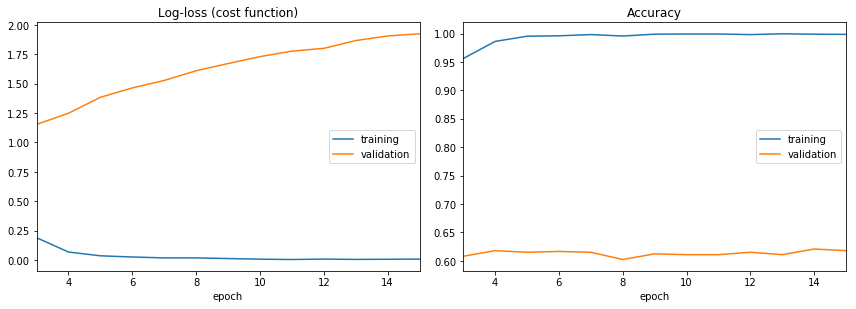

Log-loss (cost function):
training   (min:    0.004, max:    1.386, cur:    0.007)
validation (min:    0.993, max:    1.925, cur:    1.925)

Accuracy:
training   (min:    0.441, max:    1.000, cur:    0.999)
validation (min:    0.602, max:    0.629, cur:    0.618)


In [0]:
# print(model.summary())
history = model.fit(x_train1, y_train1,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2,
                   callbacks=[plot_losses])

In [0]:
score = model.evaluate(x_test1, y_test1, batch_size=batch_size, verbose=1)
print('AKURASI DARI NN \nTest accuracy:', score[1])

881/881 [==============================] - 0s 195us/step
AKURASI DARI NN 
Test accuracy: 0.5959137343927355


In [0]:
print('F1 Score Model 1:', f1_score(encoder.transform(y_test), model.predict_classes(x_test1), average='weighted')) 

F1 Score Model 1: 0.5902002212940941


Normalized confusion matrix


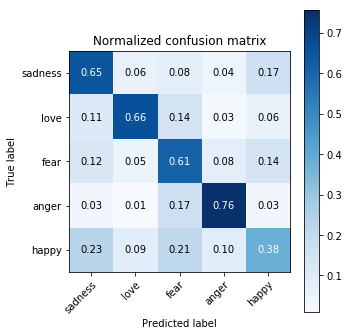

In [0]:
label_index = model.predict_classes(x_test1)
      
label = encoder.inverse_transform(label_index)

plot_confusion_matrix(y_test_temp, label, classes=list(set(y_test_temp)), normalize=True, title='Normalized confusion matrix')

plt.show()

In [0]:
set(y_test_temp)

NameError: ignored

In [0]:
text = input('Input sentence:')
text_list = []
text_list.append(text)
print(text_list)
text_test =tokenize.texts_to_matrix(text_list)
result = model.predict_classes(text_test)
if result == 0:
  result1 = 'anger'
elif result == 1:
  result1 = 'fear'
elif result == 2:
  result1 = 'happy'
elif result == 3:
  result1 = 'love'
elif result == 4:
  result1 = 'sadness'
print(result1)

KeyboardInterrupt: ignored

In [0]:
y_test1

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]], dtype=float32)

In [0]:
# Save Model
model.save('multiclass-classifier-dnn.h5')

# Word Embedding Features Vector Method

In [0]:
# NOTE: PLEASE MAKE SURE YOU ARE RUNNING THIS IN A PYTHON3 ENVIRONMENT

import tensorflow as tf
print(tf.__version__)

# This is needed for the iterator over the data
# But not necessary if you have TF 2.0 installed
# !pip install tensorflow==2.0.0-beta0


# tf.enable_eager_execution()

# !pip install -q tensorflow-datasets


1.14.0


In [0]:
import numpy as np

training_labels_final = np.array(encoder.transform(y_train))
testing_labels_final = np.array(encoder.transform(y_test))
training_labels_final

array([4, 4, 4, ..., 4, 0, 4])

In [0]:
training_sentences = x_train
testing_sentences = x_test
training_sentences

['kaget dapet berita tetangga solo tinggal dunia typus ambeyen ambil nyawa bene bener ndak lihat umur innalillahi wa innailaihi r jiun sending a fatihah',
 'tida enak bada pulang kerjan',
 'iya nya ngelahirin anak cewek tpi gak nya aja kasih nikmat lgi uji si makmak kali berat tinggal suami tinggal singel parent',
 'jiyeeee jiyeee jeng dom abis menang lawan kei langsung sambut hangat girl friend kimlad halaaah sandiwara username username username username',
 'cinta penuh harga cinta senyum',
 'akh senen neng nonton foreign filmatau fil film non hollywood nyata emang fil film asing ga kalah bagus storyline cinematography visual effects dsbnya bene bener anti mainstream',
 'alloh maha maha romantis kalo bilang tunggu paksa sabar tawakkal alloh alloh asa bikin merinding saking romantis',
 'sayang emang holmes dapet menit suns muscala outside shooting beda',
 'ati sis username leptopku abis update trs restart jd black screen pointernya muter trs ga log in restore ga krn ga sengaja hapus',


In [0]:
vocab_size = 20000
embedding_dim = 100
max_length = 200
trunc_type='post'
oov_tok = "<OOV>"


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index
print('word_index:', word_index)
sequences = tokenizer.texts_to_sequences(training_sentences)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)
print('padded:', padded)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)



word_index: {'<OOV>': 1, 'username': 2, 'ga': 3, 'orang': 4, 'aja': 5, 'kalo': 6, 'cinta': 7, 'sayang': 8, 'takut': 9, 'udah': 10, 'gak': 11, 'nya': 12, 'sih': 13, 'banget': 14, 'tau': 15, 'tp': 16, 'gitu': 17, 'anak': 18, 'hati': 19, 'salah': 20, 'suka': 21, 'pas': 22, 'bikin': 23, 'ku': 24, 'kasih': 25, 'jalan': 26, 'gua': 27, 'moga': 28, 'si': 29, 'kali': 30, 'nyata': 31, 'sampe': 32, 'bgt': 33, 'hidup': 34, 'biar': 35, 'bilang': 36, 'kerja': 37, 'sakit': 38, 'liat': 39, 'makan': 40, 'jd': 41, 'kau': 42, 'allah': 43, 'rumah': 44, 'terima': 45, 'emang': 46, 'pake': 47, 'lihat': 48, 'temen': 49, 'udh': 50, 'jam': 51, 'tuh': 52, 'org': 53, 'bener': 54, 'gin': 55, 'gimana': 56, 'masuk': 57, 'ken': 58, 'kayak': 59, 'ajar': 60, 'jg': 61, 'deh': 62, 'pulang': 63, 'pikir': 64, 'sm': 65, 'jatuh': 66, 'selamat': 67, 'w': 68, 'laku': 69, 'bahagia': 70, 'mas': 71, 'krn': 72, 'baca': 73, 'coba': 74, 'langsung': 75, 'karna': 76, 'buka': 77, 'indonesia': 78, 'nih': 79, 'tidur': 80, 'klo': 81, 'iya

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(padded[1]))
print(training_sentences[1])

? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? tida enak bada pulang kerjan
tida enak bada pulang kerjan


In [0]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])
model2.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model2.summary()


Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 200, 100)          2000000   
_________________________________________________________________
flatten_15 (Flatten)         (None, 20000)             0         
_________________________________________________________________
dense_45 (Dense)             (None, 256)               5120256   
_________________________________________________________________
dropout_25 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_26 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_47 (Dense)             (None, 5)               

In [0]:
from livelossplot.tf_keras import PlotLossesCallback

plot_losses = PlotLossesCallback()

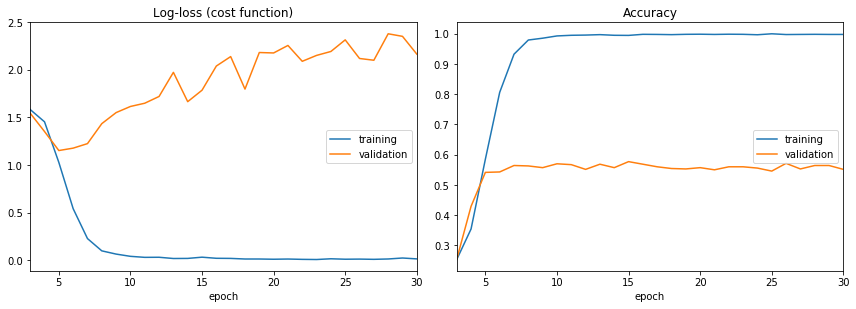

Log-loss (cost function):
training   (min:    0.007, max:    1.669, cur:    0.013)
validation (min:    1.151, max:    2.377, cur:    2.163)

Accuracy:
training   (min:    0.216, max:    0.999, cur:    0.997)
validation (min:    0.229, max:    0.577, cur:    0.551)
2816/2816 [==============================] - 1s 486us/sample - loss: 0.0131 - acc: 0.9972 - val_loss: 2.1632 - val_acc: 0.5511


In [0]:
num_epochs = 30
model2.fit(padded, training_labels_final,
          epochs=num_epochs,
          validation_split=0.2,
          #validation_data=(testing_padded, testing_labels_final),
          callbacks=[plot_losses])

In [0]:
#validation_data=(testing_padded, testing_labels_final
score2 = model2.evaluate(testing_padded, testing_labels_final)
print('AKURASI DARI NN \nTest accuracy:', score2[1])

881/881 [==============================] - 0s 111us/sample - loss: 2.1867 - acc: 0.5596
AKURASI DARI NN 
Test accuracy: 0.55959135


In [0]:
# F1 Score
print('F1 Score:', )

Normalized confusion matrix


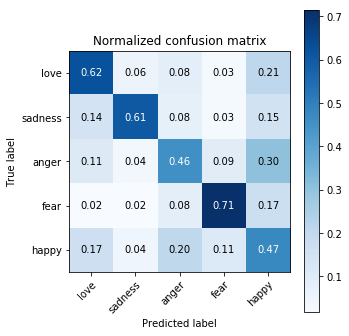

In [0]:
label_index = model2.predict_classes(testing_padded)
      
label = encoder.inverse_transform(label_index)

plot_confusion_matrix(y_test_temp, label, classes=list(set(y_test_temp)), normalize=True, title='Normalized confusion matrix')

plt.show()

In [0]:
print('F1 Score Model 2:', f1_score(encoder.transform(y_test), model2.predict_classes(testing_padded), average='weighted')) 

F1 Score Model 2: 0.5620554475954808


In [0]:
# Save Model
model2.save('multiclass-classifier-dnn-embedding.h5')

In [0]:
feature_names=cv.get_feature_names()

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform(x_test))
print(tf_idf_vector) 
  
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
print(sorted_items)

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,150)
print(keywords)

# print("\n===Keywords===")
# for k in keywords:
#     print(k,keywords[k])

  (0, 10945)	0.2958566280352591
  (0, 10679)	0.39475736260155425
  (0, 10355)	0.4266019864457424
  (0, 6515)	0.31163504946745096
  (0, 4047)	0.5006168741925714
  (0, 2725)	0.39475736260155425
  (0, 310)	0.2666068104324447
  (1, 11531)	0.33596988004394596
  (1, 11504)	0.25946659915142445
  (1, 10772)	0.35551625312195445
  (1, 8299)	0.6525921802301435
  (1, 8162)	0.14580115350745387
  (1, 4222)	0.3082331352363157
  (1, 916)	0.38893099860377817
  (2, 11774)	0.07987276704170455
  (2, 11604)	0.18148310730617453
  (2, 11547)	0.27679734443189735
  (2, 10905)	0.21097690755743723
  (2, 10866)	0.22422215573114196
  (2, 10059)	0.21323068399044517
  (2, 9629)	0.1384826280091776
  (2, 9523)	0.27679734443189735
  (2, 9278)	0.24686505704084244
  (2, 9061)	0.24090919494849214
  (2, 7017)	0.18424532671039803
  :	:
  (878, 9157)	0.2566076654170408
  (878, 8683)	0.22849741622422412
  (878, 7009)	0.33351296964132543
  (878, 5434)	0.37264894314646263
  (878, 3648)	0.33351296964132543
  (878, 3605)	0.207129

In [0]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

model = load_model('multiclass-classifier-dnn.h5')

OSError: ignored

In [0]:
model.summary()

In [0]:
text = input('')
text_test = tokenize.texts_to_matrix(text)
print('dnn prediction:', model.predict_classes(text_test)[])